# Import libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Import CSV + create DF

In [39]:
import csv

# Directly read the CSV into a DataFrame
df = pd.read_csv('sales.csv')

rl = pd.read_csv('REAL_DATA.csv')

In [50]:
rl.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,1,0,0,0,0,0
1,558468,27,7,1,0,0,0,0,0
2,76950,404,3,1,657,1,1,0,0
3,77556,683,2,1,862,1,0,0,0
4,456344,920,3,1,591,1,1,0,0


In [ ]:
df.set_index("ID")

KeyError: "None of ['ID'] are in the columns"

# Explore & clean

## 

In [5]:
df.describe()

,ID,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [6]:
# Check for missing values
df.isnull().any()

ID                     False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
sales                  False
dtype: bool

In [40]:
# Check for missing values
rl.isnull().any()

index                  False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
dtype: bool

In [ ]:
# Check for missing values
rl.isnull().any()

index                  False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
dtype: bool

In [41]:
# Check for column data types
print(rl.dtypes)

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
rl['date'] = pd.to_datetime(df['date'])

In [9]:
# List values for state holiday
df['state_holiday'].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [10]:
#Map state holidays values

# Define the mapping
value_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}

# Convert using the mapping
df['state_holiday'] = df['state_holiday'].map(value_mapping)

In [43]:
#Map state holidays values

# Define the mapping
value_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}

# Convert using the mapping
rl['state_holiday'] = df['state_holiday'].map(value_mapping)

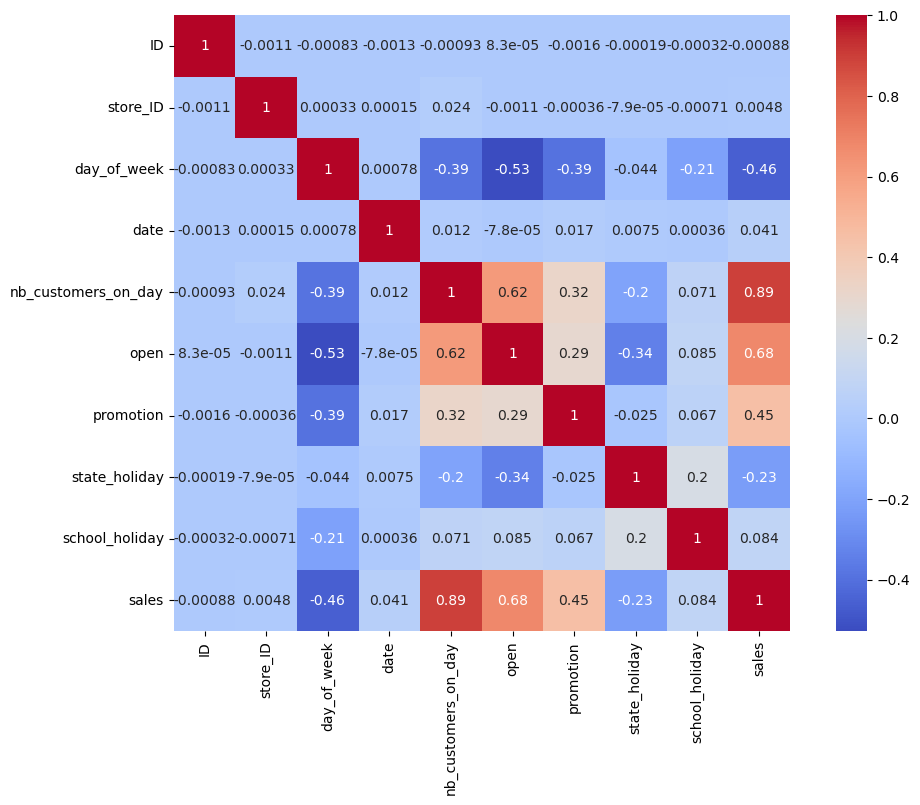

In [11]:
# Check correlation

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap= "coolwarm", square = True)
plt.show()

# CREATE MODEL A - Linear Regression

In [12]:
#Removing dates because they create 
dfa = df

dfa['date'] = dfa['date'].astype('int64') // 10**9

dfa.head()

,ID,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,1366243200,517,1,0,0,0,4422
1,291687,394,6,1428710400,694,1,0,0,0,8297
2,411278,807,4,1377734400,970,1,1,0,0,9729
3,664714,802,2,1369699200,473,1,1,0,0,6513
4,540835,726,4,1381363200,1068,1,1,0,0,10882


In [46]:
#Removing dates because they create 
rla = rl

rla['date'] = rla['date'].astype('int64') // 10**9

rla.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,1,0,0,0,0,0
1,558468,27,7,1,0,0,0,0,0
2,76950,404,3,1,657,1,1,0,0
3,77556,683,2,1,862,1,0,0,0
4,456344,920,3,1,591,1,1,0,0


In [13]:
from sklearn.linear_model import LogisticRegression

X = dfa.drop('sales', axis=1)
y = dfa['sales']

print(X)
print(y)

            ID  store_ID  day_of_week        date  nb_customers_on_day  open  \
0       425390       366            4  1366243200                  517     1   
1       291687       394            6  1428710400                  694     1   
2       411278       807            4  1377734400                  970     1   
3       664714       802            2  1369699200                  473     1   
4       540835       726            4  1381363200                 1068     1   
...        ...       ...          ...         ...                  ...   ...   
640835  359783       409            6  1382745600                  483     1   
640836  152315        97            1  1397433600                  987     1   
640837  117952       987            1  1404691200                  925     1   
640838  435829      1084            4  1402531200                  725     1   
640839  305711       695            7  1430611200                    0     0   

        promotion  state_holiday  schoo

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (512672, 9)
X_test shape: (128168, 9)
y_train shape: (512672,)
y_test shape: (128168,)


In [15]:
y_train.head()

360184     7534
162306    11018
80802      7452
607893     6938
606656     4679
Name: sales, dtype: int64

In [16]:
print(dfa.loc[162306])

ID                         351987
store_ID                      729
day_of_week                     3
date                   1401235200
nb_customers_on_day          1125
open                            1
promotion                       0
state_holiday                   0
school_holiday                  0
sales                       11018
Name: 162306, dtype: int64


In [17]:
# Fit the model

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [18]:
#Train the model

y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

print(y_pred_test)
print("")
print(y_pred_train)

[9858.24453986  -57.46624651 5185.49951332 ... 9743.20308817 8656.96936066
 7792.15698745]

[7427.31044404 8609.23210097 9019.53779864 ...  -95.40034629  583.01680063
 5241.54719161]


In [19]:
# Calculate R²:

from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("R-squared (Training):", train_r2)
print("R-squared (Testing):", test_r2)

R-squared (Training): 0.8542590597616347
R-squared (Testing): 0.8515623432943853


# CREATE MODEL ? - Random forest

In [20]:
#Removing dates because they create 
# dfrf = df

# dfrf['date'] = dfrf['date'].astype('int64') // 10**9

# dfrf.head()

In [21]:
# Fit the model

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

rf = RandomForestRegressor(n_estimators=120, criterion="squared_error", random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [22]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

print(y_pred_test_rf)
print("**********************")
print(y_pred_train_rf)

[ 9952.175          0.          4615.30833333 ... 11493.525
  9577.08333333  7648.15      ]
**********************
[ 7651.81666667 10372.425       7990.59166667 ...     0.
     0.          4629.36666667]


In [23]:
# Calculate R²:

from sklearn.metrics import r2_score

train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print("R-squared (Training):", train_r2_rf)
print("R-squared (Testing):", test_r2_rf)

R-squared (Training): 0.9923174612208796
R-squared (Testing): 0.9443351173626787


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_test_rf)
mse = mean_squared_error(y_test, y_pred_test_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rf)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 570.1569546740737
Mean Squared Error: 822819.4428710169
Root Mean Squared Error: 907.0939548200158
R-squared: 0.9443351173626787


In [ ]:
y_true = rfa['sales']  # Replace with the actual column name
y_pred_test_rf

In [ ]:
X_real_life = []

# Make predictions on the real evaluation data
predicted_sales = rla.predict(X_real_life)

# Add the predictions as a new column in the original data
rla['sales'] = predicted_sales

# Set predicted sales to zero if the store is closed (open = 0)
rla.loc[rla['open'] == 0, 'sales'] = 0

# Save the results to a new CSV file or display the first few rows
rla.to_csv('REAL_DATA_with_predictions.csv', index=False)

# Display the first few rows of the resulting data with predictions
print(rla.head())

# CREATE MODEL ? - SVM

In [24]:
# # Fit the model

# from sklearn.svm import SVC, SVR

# svr = SVR(kernel='linear', C=1.0)
# svr.fit(X_train, y_train)

In [25]:
# y_pred_test_svr = svr.predict(X_test)
# y_pred_train_svr = svr.predict(X_train)

# print(y_pred_test_svr)
# print("**********************")
# print(y_pred_train_svr)

In [26]:
# # Calculate R²:

# from sklearn.metrics import r2_score

# train_r2_svr = r2_score(y_train, y_pred_train_svr)
# test_r2_svr = r2_score(y_test, y_pred_test_svr)

# print("R-squared (Training):", train_r2_svr)
# print("R-squared (Testing):", test_r2_svr)

# CREATE MODEL ? - CAT BOOST

In [ ]:
# Fit the model


from catboost import CatBoostRegressor

df_features = ['day_of_week', 'open', 'promotion', 'state_holiday', 'school_holiday']

catb = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=16, verbose=0)
catb.fit(X_train, y_train, cat_features=df_features,)

Learning rate set to 0.109732
0:	learn: 3505.3890965	total: 164ms	remaining: 2m 43s
1:	learn: 3200.5882654	total: 329ms	remaining: 2m 43s
2:	learn: 2933.0147403	total: 503ms	remaining: 2m 47s
3:	learn: 2701.4409565	total: 660ms	remaining: 2m 44s
4:	learn: 2501.2922242	total: 834ms	remaining: 2m 45s
5:	learn: 2326.7339074	total: 1s	remaining: 2m 45s
6:	learn: 2177.0131441	total: 1.2s	remaining: 2m 49s
7:	learn: 2050.4866498	total: 1.37s	remaining: 2m 49s
8:	learn: 1942.1113803	total: 1.56s	remaining: 2m 52s
9:	learn: 1851.3501359	total: 1.74s	remaining: 2m 52s
10:	learn: 1775.3356473	total: 1.93s	remaining: 2m 53s
11:	learn: 1710.6778202	total: 2.1s	remaining: 2m 52s
12:	learn: 1656.8247589	total: 2.29s	remaining: 2m 53s
13:	learn: 1613.2479068	total: 2.44s	remaining: 2m 51s
14:	learn: 1576.5955820	total: 2.61s	remaining: 2m 51s
15:	learn: 1545.6517183	total: 2.77s	remaining: 2m 50s
16:	learn: 1516.4744288	total: 2.94s	remaining: 2m 50s
17:	learn: 1492.3320622	total: 3.09s	remaining: 2m

In [34]:
y_pred_test_cat = catb.predict(X_test)
y_pred_train_cat = catb.predict(X_train)

print(y_pred_test_cat)
print("**********************")
print(y_pred_train_cat)

[8.90224810e+03 8.09091235e+00 4.35740649e+03 ... 1.06225460e+04
 9.50478833e+03 8.15614422e+03]
**********************
[7749.17183631 9686.4797344  8936.36510799 ...  -44.86678075 -126.51601669
 4613.58995283]


In [35]:
# Calculate R²:

from sklearn.metrics import r2_score

train_r2_cat = r2_score(y_train, y_pred_train_cat)
test_r2_cat = r2_score(y_test, y_pred_test_cat)

print("R-squared (Training):", train_r2_cat)
print("R-squared (Testing):", test_r2_cat)

R-squared (Training): 0.9309303445917091
R-squared (Testing): 0.9288870450503883
